In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Clase 2

## Biblioteca Pandas

Pandas es una biblioteca de Python muy usada para análisis y manipulación de datos. Provee principalmente dos tipos de clases para trabajar con datos:

- **Series:** un vector unidimensional indexado, que contiene datos de cualquier tipo
como números enteros, cadenas, objetos Python, etc.

- **DataFrame:** una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

Bibliografía recomendada: Sección 5 de Python for Data Analysis, de Wes McKinney (creador de la biblioteca Pandas), disponible on-line en forma gratuita en la página
https://wesmckinney.com/book/pandas-basics

### Series

Las series de Pandas son vectores similares a los arrays de NumPy, que podemos indexar usando etiquetas.

Crear la siguiente Series, observar qué devuelve array e index e interpretar.

In [ ]:
import pandas as pd
obj = pd.Series([7,4,-5,3])
obj

In [ ]:
obj.array

In [ ]:
obj.index # Por default , los indices van de 0 a N-1.

Podemos asignar etiquetas (o índices) a cada valor de la serie.

In [ ]:
obj2 = pd.Series([np.pi,0,-2,1.41], index = ["d", "b", "c", "a"])
display(obj2)
display(obj2.array)
display(obj2.index)

Al igual que con arrays de Numpy podemos acceder a los elementos por su posición, o podemos usar las etiquetas.

In [ ]:
obj2["a"]
obj2[3]
obj2[1:3]

In [ ]:
obj3 = obj2[["a","b"]]
obj3
obj3.index

In [ ]:
obj2[obj2>1]

Las operaciones que pueden aplicarse a numpy arrays pueden aplicarse también a series de Pandas, conservando los índices.

In [ ]:
np.exp(obj2)

In [ ]:
obj2 * 3

¿Qué esperamos que de este código?

In [ ]:
obj + obj2

NaN significa "not a number", se utiliza en series de Pandas para valores faltantes (missing values).

In [ ]:
# Y ahora?
obj4 = pd.Series([1,2,3,4], index = ["d", "b", "y", "z"])
obj2 + obj4

Las series de Pandas tienen varias funciones útiles que iremos viendo más adelante. A modo de ejemplo, interpretar que hacen las siguientes funciones.

In [ ]:
series1 = pd.Series(["a", "b", "c", "b", "a", "c", "x"])
series1.isin(["b", "c"])

In [ ]:
series1.value_counts()

### DataFrames
Un data frame es una representación de los datos en formato de tabla en la que cada
columna son vectores del mismo tamaño. Como cada columna es un vector, cada columna puede
contener datos de un único tipo. Se pueden pensar como variables. Cada variable corresponde a una
serie de Pandas, y todas las series de un dataframe están indexadas por los mismos ´ındices.

Una forma de crear un data frame es utilizando un "diccionario". Todas las variables del
diccionario deben ser vectores o listas de la misma longitud. 

In [ ]:
data = {"nombres": ["Rodrigo", "Sergio", "Cristina", "Diana"], "altura": np.array([178, 172, 175, 168]), "peso": np.array
([81.2, 76.1, 68.5, 64.0])}
display(data)

In [ ]:
type(data)

In [ ]:
data["altura"]

In [ ]:
# Creamos un data frame con esos datos, usando los nombres como etiquetas
pacientes = pd.DataFrame(data)
display(pacientes)

In [ ]:
# En este ejemplo podemos usar los nombres como índices
pacientes = pd.DataFrame(data).set_index("nombres")
display(pacientes)

In [ ]:
# Podemos acceder a las columnas de dos formas distintas
alturas = pacientes["altura"]
alturas

In [ ]:
pacientes.altura

In [ ]:
type(alturas)

A diferencia de las matrices en Numpy, un DataFrame de Pandas es un conjunto de columnas, no de filas. 
Si queremos saber la altura de Rodrigo, pensar cuál de los dos comandos será correcto antes de ejecutarlos.

In [ ]:
pacientes["Rodrigo"].altura
#pacientes["altura"].Rodrigo

Para acceder a una fila de un dataframe, podemos usar los métodos `loc[]` y `iloc[]`. 

¿Cómo se usan? ¿Cuál es la diferencia entre los dos comandos?

## Gapminder

A modo de ejemplo, vamos a explorar el dataset Gapminder que contiene datos poblacionales y de desarrollo humano de distintos países a lo largo del tiempo.

Si gapminder no está instalado, ejecutrar el siguiente comando para instalarlo

In [ ]:
#pip install gapminder

In [ ]:
from gapminder import gapminder
display(gapminder)

In [ ]:
gapminder.head()

Podemos ver información básica del DataFrame con la función info

In [ ]:
gapminder.info()

In [ ]:
# Vemos todos los países en la base
gapminder["country"].unique()

In [ ]:
# Cuántos países son?
gapminder["country"].nunique()

In [ ]:
# Si queremos ver cuántos países hay en cada continente...
# podemos agregupar por continente y ver el tamaño de cada grupo
gapminder.groupby("continent").size()

In [ ]:
# Pero cada país aparece varias veces, con datos de distintos años.
# Para contar sin repeticion usamos nuevamente nunique
gapminder.groupby("continent")["country"].nunique()

In [ ]:
# Si queremos calcular porcentajes, dividimos por la cantidad total de paises
totalPaises = gapminder["country"].nunique()
gapminder.groupby("continent")["country"].nunique() / totalPaises

In [ ]:
# O podemos usar el comando value_counts y pasarle un parámetro para que nos de los valores normalizados.
# (la normalización lleva la suma total a 1)
gapminder[["continent", "country"]].drop_duplicates().continent.value_counts(normalize=True)

In [ ]:
# Vemos todos los años disponibles
gapminder["year"].unique()

In [ ]:
# Tenemos datos de todos los países todos los años?
# Agrupamos los datos por año y calculamos el tamaño de cada bloque
gapminder.groupby("year").size()

In [ ]:
# O podemos usar directamente el comando value_counts
gapminder.year.value_counts()

In [ ]:
# También podemos por ejemplo calcular la poblacion total por año
gapminder.groupby("year")["pop"].sum()

### Gráficos simples de funciones o puntos en el plano XY.
Vamos a graficar la población total mundial en función del año.

In [93]:
pobAnual = gapminder.groupby("year")["pop"].sum()
type(pobAnual)

pandas.core.series.Series

In [94]:
pobAnual

year
1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
Name: pop, dtype: int64

In [95]:
pobAnual.index

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

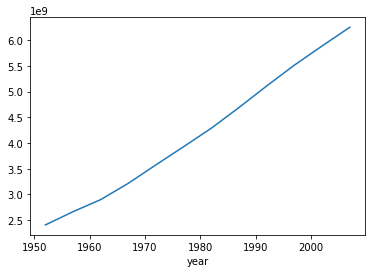

In [97]:
# Opción 1
# Usamos la función plot de series de pandas
pobAnual.plot()

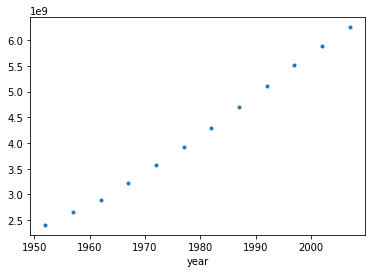

In [100]:
# O podemos graficar solo puntos
pobAnual.plot(style = ".")

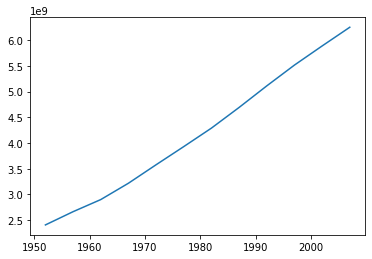

In [101]:
# Opcion 3
# Asignamos los valores a variables (arrays de numpy) y graficamos las variables
x = pobAnual.index
y = pobAnual.values
plt.plot(x,y)

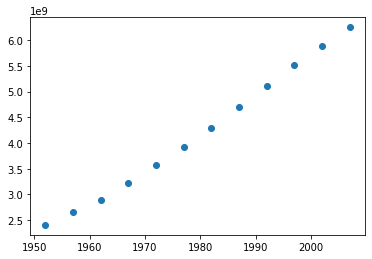

In [103]:
# Opcion 4
# Matplotlib tiene una función scatter para graficar puntos
plt.scatter(x,y)

In [104]:
# Vamos a analizar los datos de 2007
datos2007 = gapminder[gapminder["year"]==2007]

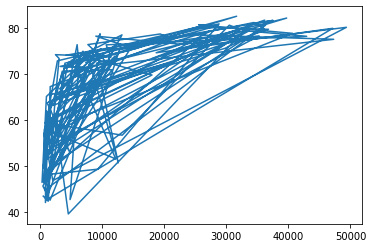

In [106]:
# Queremos ver si hay relación entre el producto bruto y la expectativa de vida
plt.plot(datos2007.gdpPercap, datos2007.lifeExp)

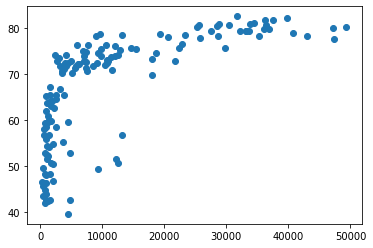

In [107]:
# Ay no, eso no, hacemos un "scatter plot"
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

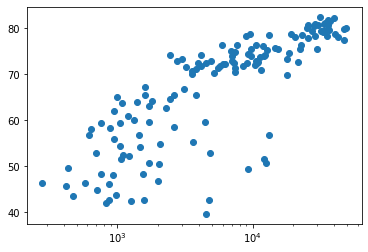

In [109]:
# Se ve mejor la correlación si usamos escala logaritmica en el eje X
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')

Vamos a mejorar un poco el gráfico

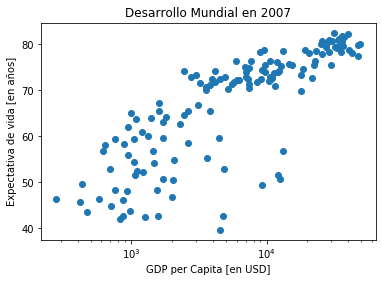

In [111]:
# Agregamos etiquetas al gráfico y a los ejes
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.show()

Reemplacemos las marcas en el eje $x$ 10³, 10⁴, 10⁵ con 1k, 10k y 100k. 

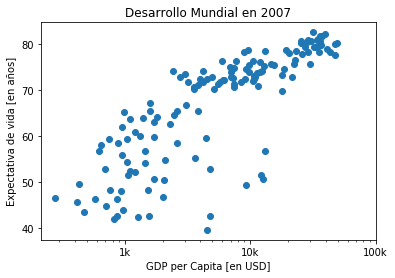

In [112]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

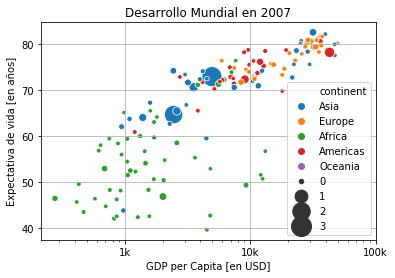

In [122]:
# Almacenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np.array(datos2007["pop"])*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop*2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

In [ ]:
# Aumenta el tamaño del gráfico
plt.figure(dpi=150)
# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

## Estadística descriptiva

Mirando los datos de 2007, ¿cuál es el país con mayor expectativa de vida? ¿Cuál es el país con menor expectativa de vida?

### Medidas de tendencia central

Para el año 2007, calcular el valor medio y la mediana de las variables gdpPercap y lifeExp entre todos los países.
Son similares o distintas? A qué lo atribuyen? Consideran que alguna resume mejor la realidad que la otra?


In [ ]:
datos2007["lifeExp"].median()

In [ ]:
datos2007["lifeExp"].mean()

In [ ]:
datos2007["gdpPercap"].median()

In [ ]:
datos2007["gdpPercap"].mean()

Es lo mismo el promedio de entre todos los países de la expectativa de vida y el promedio entre todas las personas entre todas las personas?
¿Cómo podemos calcular el promedio entre todas las personas?


### Medidas de dispersión

Para el año 2007, calcular la varianza y el desvío estándar de las variables gdpPercap y lifeExp entre todos los países.

In [91]:
datos2007["lifeExp"].var()

145.75782404714803

In [92]:
datos2007["lifeExp"].std()

12.073020502225118